In [70]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('../')
from compressor.core import compressor, show_img

In [73]:
def visualize_results(image_name, ranks, im_type='grey', save=True):
    """
    util function for fast visalization and compare SVD and SSVD algorithms due different ranks 
    :param image_name: str: name of image in 'img' folder
    :param ranks: list(int): list of different ranks to compare (at least 2)
    :param im_type: 'grey'|'rgb': type of image
    :param save: boolean: True if you want to save image, False - otherwise
    :return: None
    """
    im_type = 'grey' if im_type.lower() == 'gray' else im_type.lower()
    def compute_path(name):
        return '../img/' + name + '.jpg'
    
    if len(ranks) < 2:
        print("You must set at least 2 ranks")
        return
    
    if not os.path.exists("./results"):
        os.makedirs("./results")
    progress=0
    
    f, axarr = plt.subplots(len(ranks), 2, figsize=(12, 6 * len(ranks)))
    f.suptitle("SVD vs SSVD (" + im_type +")", fontsize=14, fontweight='bold')
    for index, rank in enumerate(ranks):
        image = compressor(compute_path(image_name), rank=rank, im_type=im_type, compressor_type='SVD', verbose=False)
        axarr[index, 0].imshow(image)
        axarr[index, 0].set_title(image_name + ', rank='+ str(rank) + ', SVD')
        progress += 1
        print("Progress: " + str(round(progress / (len(ranks) * 2) * 100, 2)) + "%")
        image = compressor(compute_path(image_name), rank=rank, im_type=im_type, compressor_type='SSVD', verbose=False)
        axarr[index, 1].imshow(image)
        axarr[index, 1].set_title(image_name + ', rank='+ str(rank) + ', SSVD')
        progress += 1
        print("Progress: " + str(round(progress / (len(ranks) * 2) * 100, 2)) + "%")
    if save:
        f.savefig("./results/" + image_name + "_" + im_type + ".png")
    plt.show()

Progress: 10.0%
Progress: 20.0%
Progress: 30.0%
Progress: 40.0%
Progress: 50.0%
Progress: 60.0%
Progress: 70.0%
Progress: 80.0%
Progress: 90.0%
Progress: 100.0%


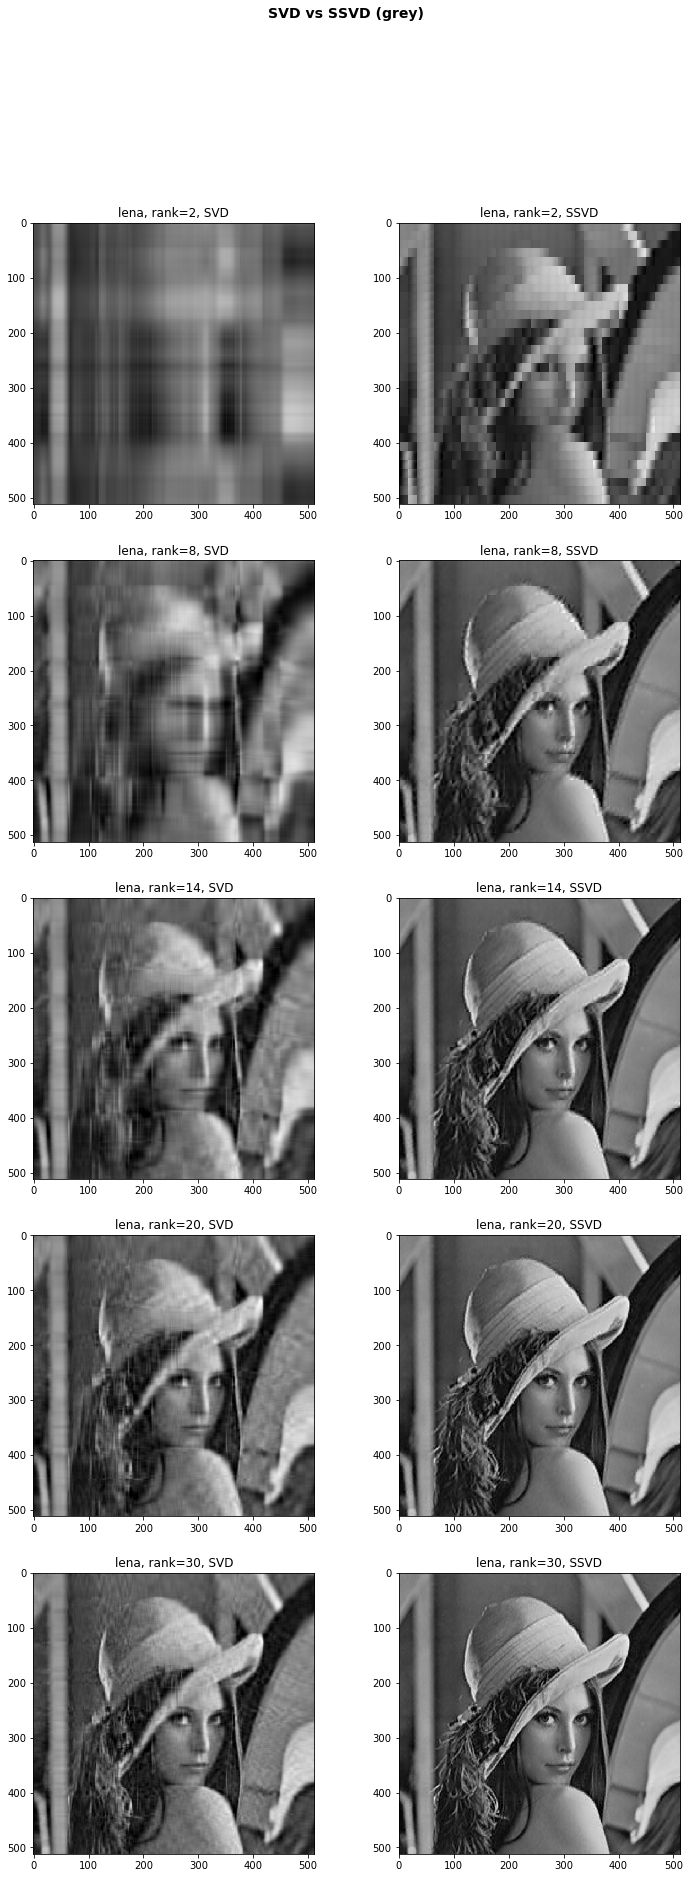

In [61]:
visualize_results('lena', [2, 8, 14, 20, 30], im_type='gray', save=True)

In [ ]:
visualize_results('cat', [30, 60, 100, 200], im_type='grey', save=True)

Progress: 16.67%
Progress: 33.33%
Progress: 50.0%
Progress: 66.67%
Progress: 83.33%
Progress: 100.0%


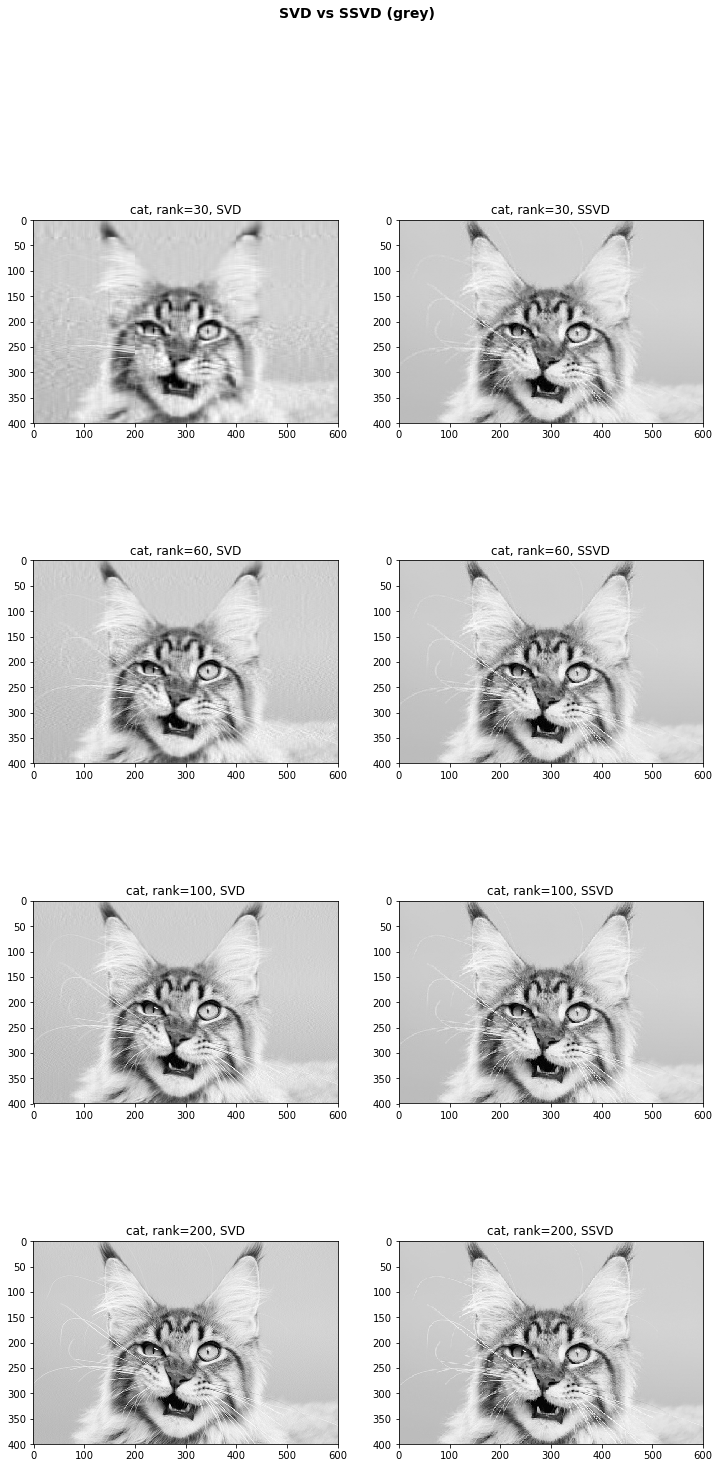

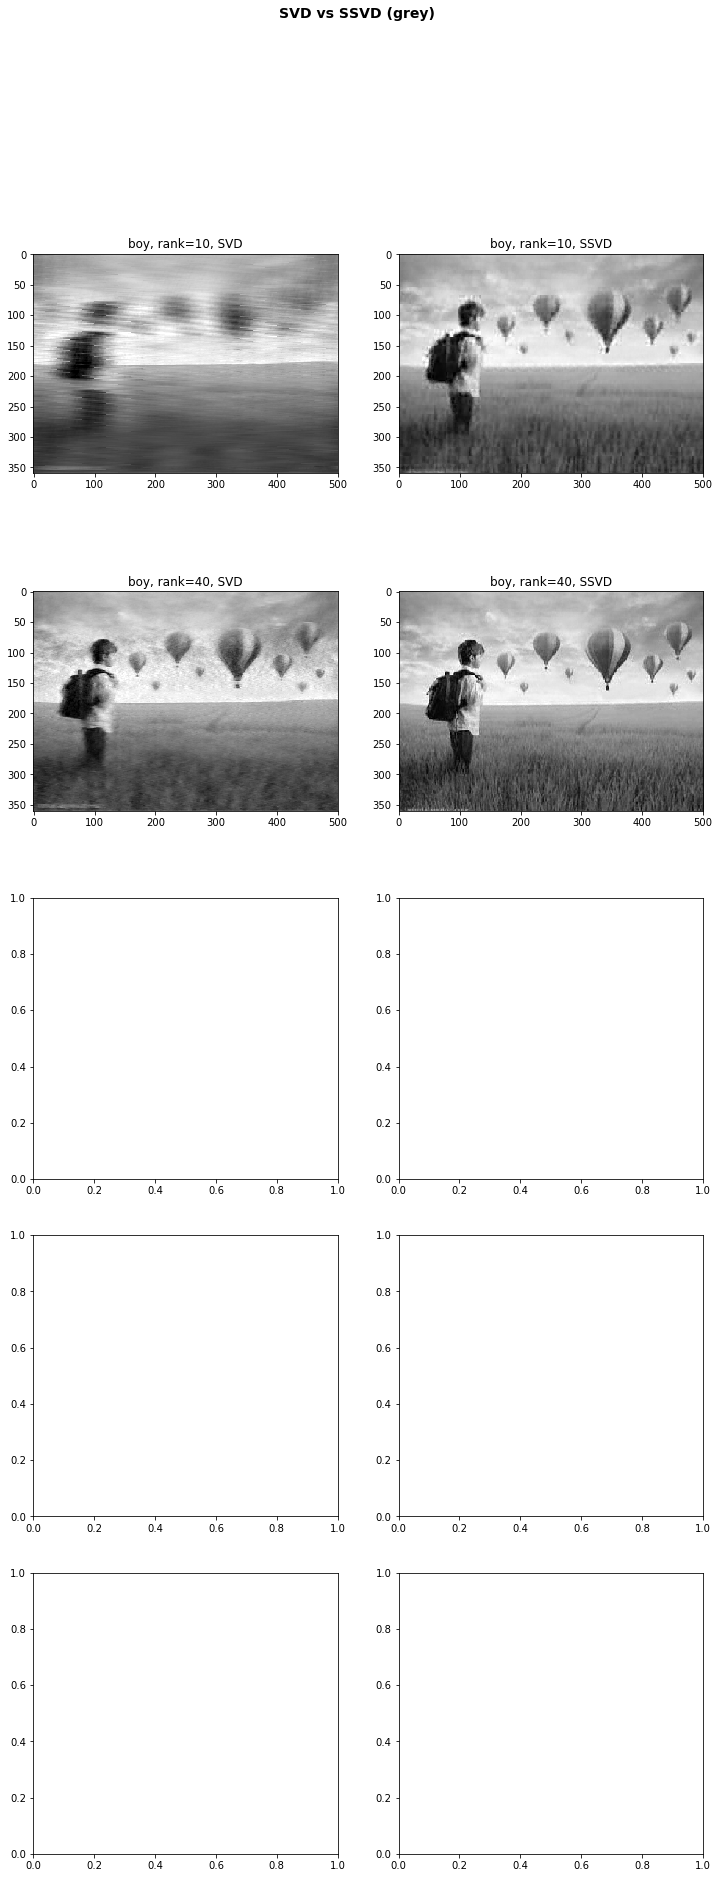

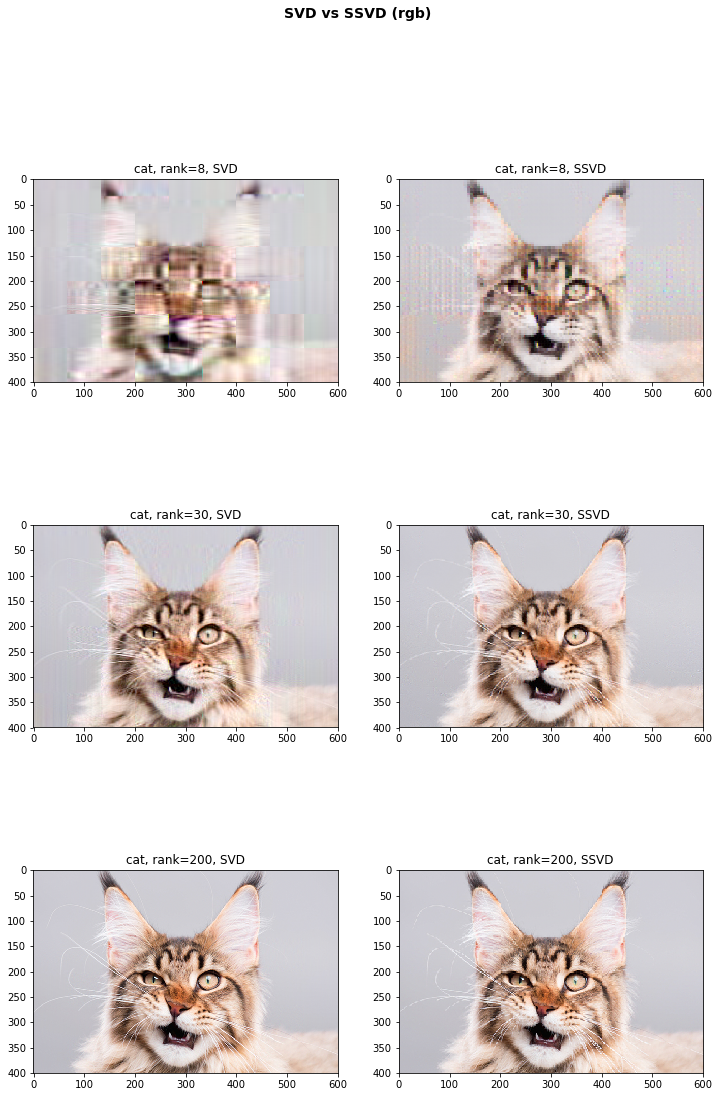

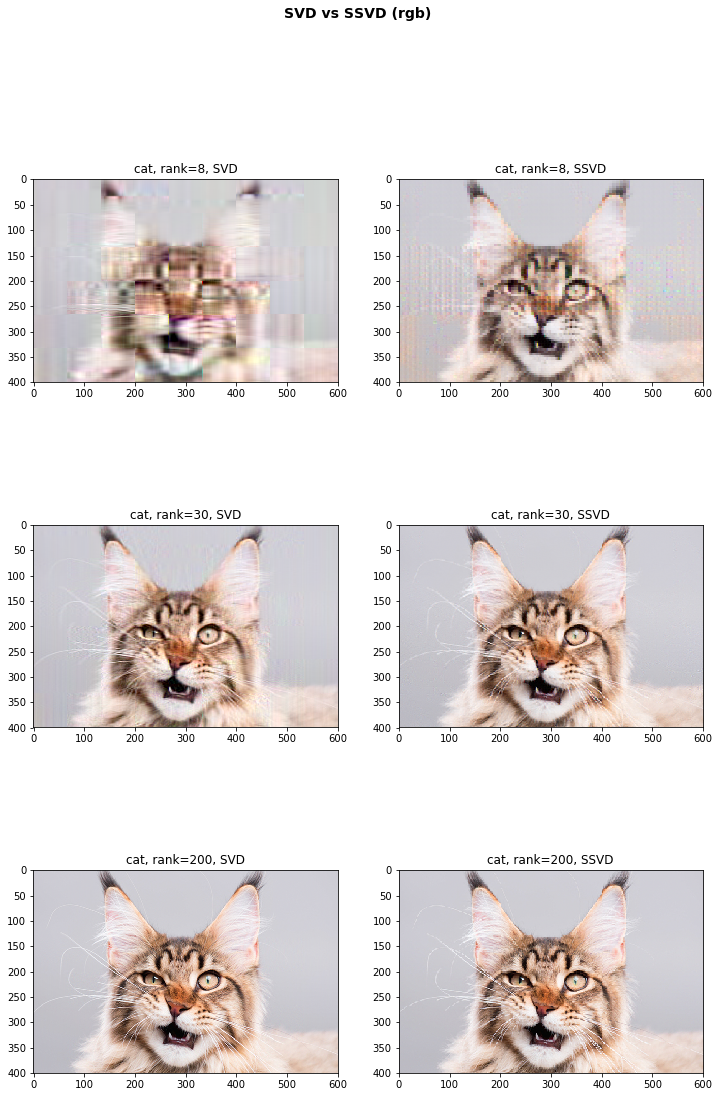

In [72]:
visualize_results('cat', [8, 30, 200], im_type='rgb', save=True)

Progress: 10.0%
Progress: 20.0%
Progress: 30.0%
Progress: 40.0%
Progress: 50.0%
Progress: 60.0%
Progress: 70.0%
Progress: 80.0%
Progress: 90.0%
Progress: 100.0%


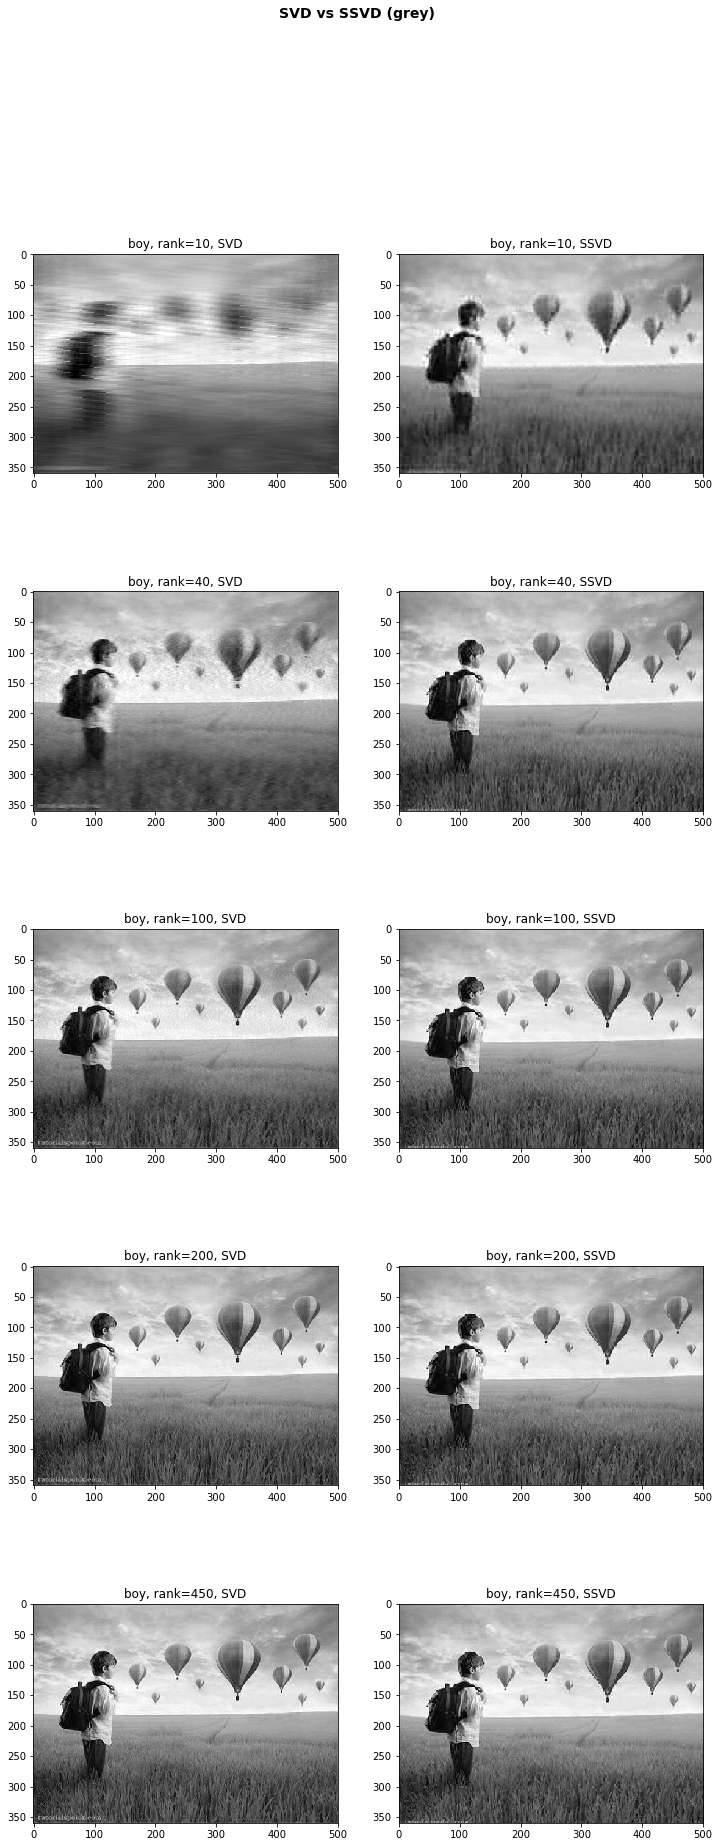

In [74]:
visualize_results('boy', [10, 40, 100, 200, 450], im_type='grey', save=True)

Progress: 10.0%
Progress: 20.0%
Progress: 30.0%
Progress: 40.0%
Progress: 50.0%
Progress: 60.0%
Progress: 70.0%
Progress: 80.0%
Progress: 90.0%
Progress: 100.0%


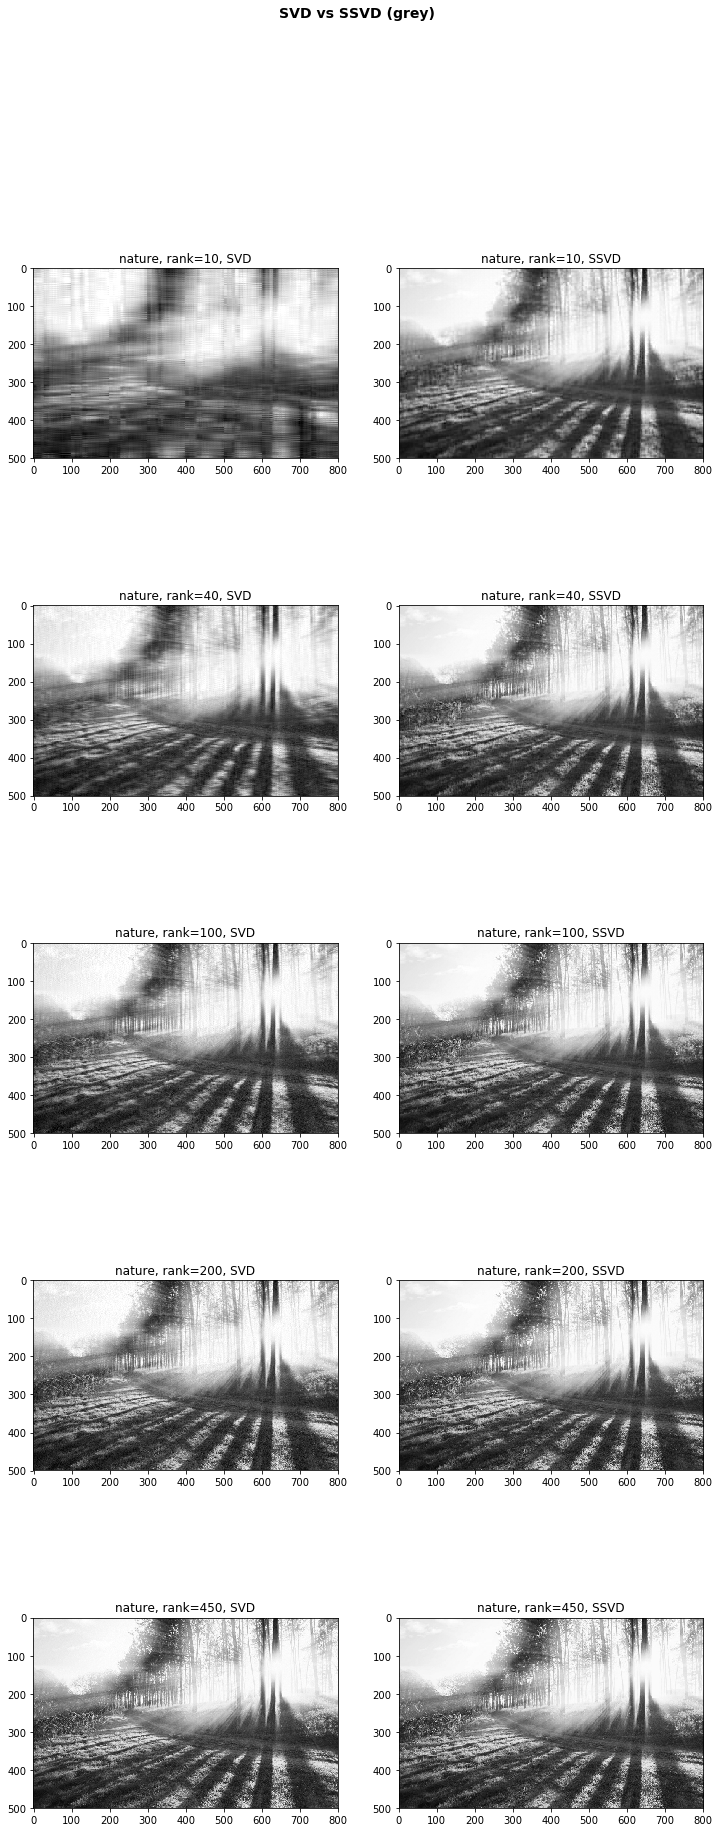

In [75]:
visualize_results('nature', [10, 40, 100, 200, 450], im_type='grey', save=True)